In [2]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.8 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/JHUBCIS/EEG_Project.git
%cd EEG_Project
from google.colab import files
import numpy as np
import mne
import matplotlib.pyplot as plt

filename = "OpenBCI-RAW-2023-12-09_17-31-10.csv"
channels = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
f = open(filename, 'r')
lines = f.readlines()
print(len(lines))
for line in lines:
    l = line.strip().split(", ")
    for i in range(1, 17):
        num = float(l[i])*0.001869917138805
        channels[i-1].append(num)

channels = np.array(channels)
print(channels.shape)
print(channels[0][0])
ch_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
sfreq = 125
ch_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']

Cloning into 'EEG_Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 9.91 MiB | 15.12 MiB/s, done.
/content/EEG_Project
67033
(16, 67033)
79.87399028853253


Creating RawArray with float64 data, n_channels=16, n_times=67033
    Range : 0 ... 67032 =      0.000 ...   536.256 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<ipython-input-4-b336556b3948>:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (6.600 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)


<ipython-input-4-b336556b3948>:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd()


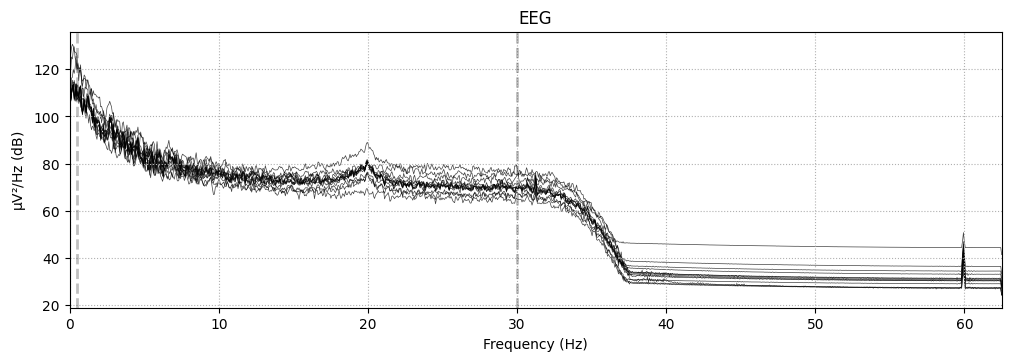

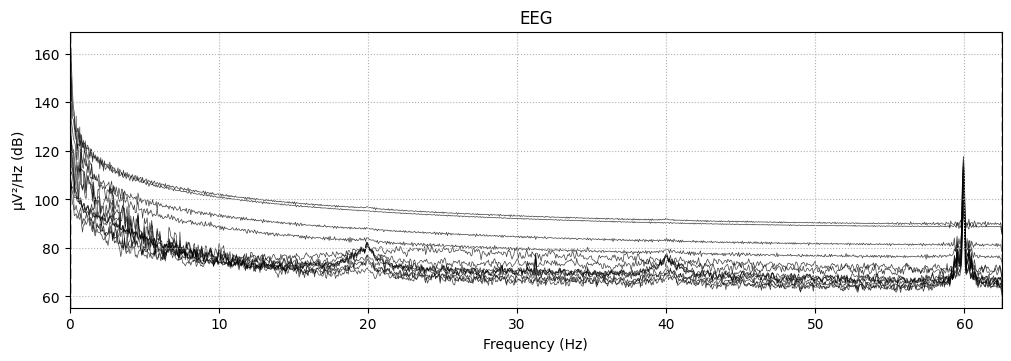

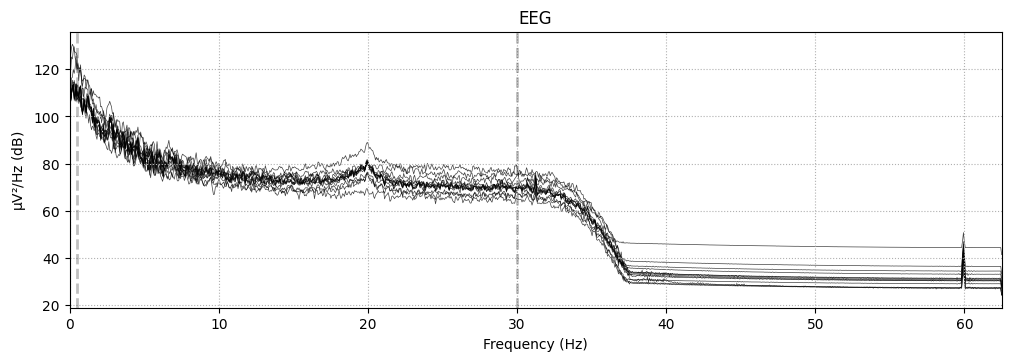

In [4]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
#add information about bad channels that need to removed
info['bads'] = ['5', '13', '15']
raw = mne.io.RawArray(channels, info)
data, times = raw[:]
raw.plot_psd()
raw.set_eeg_reference()
filtered = raw.filter(0.5, 30)
filtered.plot_psd()

In [7]:
data, times = filtered[:]
print(data.shape)

(16, 67033)
